Construindo um grafo automaticamente
====================================



## Introdução



Neste notebook nós vamos dar o primeiro passo para construir nossa rede neural artificial. Neste primeiro passo, nós vamos criar uma classe que gera automaticamente o nosso `grafo computacional`. O grafo computacional é o grafo que representa todas as operações matemáticas que ocorreram ao se computar um certo valor $y$. O grafo computacional é um passo necessário pois será baseado nele que iremos computar os gradientes locais necessários para realizar o `backpropagation`.



## Importações



In [1]:
from funcoes import plota_grafo

## Código e discussão



### Primeiros passos



A base de tudo será uma classe chamada `Valor`. Vamos começar pelo básico!



In [2]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

Vamos testar nossa classe!



In [3]:
x1 = Valor(60)
print(x1)
print(x1.data)

Valor(data=60)
60


### Os dunders `__add__` e `__mul__`



Observe que não conseguimos adicionar nem multiplicar objetos criados com a classe `Valor`.



<p style='text-align: justify'><i>Não se assuste!! Aqui é esperado que dê erro mesmo! Foi proposital e serve de exemplificação do que estamos querendo mostras (que não é possível realizar, até memso essas operações básicas para nós, antes de definirmo-las na classe)...</i></p>

In [4]:
a = Valor(10)
b = Valor(5)

In [5]:
print(a + b)

TypeError: unsupported operand type(s) for +: 'Valor' and 'Valor'

In [6]:
print(a * b)

TypeError: unsupported operand type(s) for *: 'Valor' and 'Valor'

Ué&#x2026; porque não conseguimos? Não conseguimos pois o Python (ainda) não é vidente. Ele lá vai saber como adicionar ou multiplicar algo que você criou? Pra você parece óbvio que valores podem ser adicionados ou multiplicados, mas para o Python ele nem sabe o que significa a palavra `Valor`&#x2026;

Como sempre, temos que contar para o programa o que queremos que aconteça quando usarmos os operadores `+` e `*`. Quem faz isso são os dunders `__add__` e `__mul__`.



In [7]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor): # definindo como será feita a soma
        saida = Valor(self.data + outro_valor.data)
        return saida

    def __mul__(self, outro_valor): # definindo como será feita a multiplicação
        saida = Valor(self.data * outro_valor.data)
        return saida

Vamos testar!



In [8]:
a = Valor(10)
b = Valor(5)

print(a + b)
print(a * b)

Valor(data=15)
Valor(data=50)


<p style='text-align: justify'><i>(Agora sim deu o esperado, não é mesmo? Uhuul, que alívio.)</i></p>

### Registrando os progenitores



Nosso objetivo é construir um grafo computacional. Em um grafo computacional, um certo vértice pode ter um ou mais vértices progenitores (são seus pais/mães). Nós não podemos perder essa informação quando formos construir um grafo, então precisamos incluir essa informação na nossa classe.



In [9]:
class Valor:
    def __init__(self, data, progenitor=()):
        self.data = data
        self.progenitor = progenitor

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

Vamos testar!



In [10]:
a = Valor(10)
b = Valor(5)

print(a.data)
print(a.progenitor)

c = a + b
d = c * a

print(c)
print(a)
print(d.progenitor)

10
()
Valor(data=15)
Valor(data=10)
(Valor(data=15), Valor(data=10))


### Registrando o operador mãe



Em um grafo computacional, um vértice pode ter um operador mãe. O operador mãe é o operador que foi usado para gerar o vértice.



In [11]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



In [12]:
a = Valor(10)
b = Valor(5)

c = a + b
d = c * a

print(c)
print(c.progenitor)
print(c.operador_mae)

print(a.operador_mae)

Valor(data=15)
(Valor(data=10), Valor(data=5))
+



### Plotando o primeiro grafo



Vamos plotar nosso primeiro grafo!



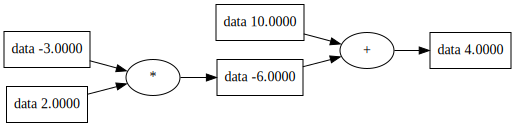

In [13]:
a = Valor(2)
b = Valor(-3)
c = Valor(10)

d = a * b
e = d + c

plota_grafo(e)

### Registrando o rótulo



Nosso grafo seria mais legível se tivéssemos rótulos indicando o que é cada vértice. Vamos incluir essa informação na nossa classe.



In [14]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo # com isso, vamos estar rotulando nossos vértices!

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



In [15]:
a = Valor(2, rotulo="a")
b = Valor(-3, rotulo="b")
c = Valor(10, rotulo="c")

d = a * b
e = d + c

d.rotulo = "d"
e.rotulo = "e"

plota_grafo(e)

grafo = plota_grafo(e)
print(grafo) # aqui vemos uma outra forma de obtermos o gráfico... podemos pedir esse tipo de escrita, com 
             # a qual poderíamos colocar em um site (dito na conclusão) e teríamos os grafo plotado!

digraph {
	graph [rankdir=LR]
	1785429358720 [label="{ e | data 4.0000 }" shape=record]
	"1785429358720+" [label="+"]
	"1785429358720+" -> 1785429358720
	1785429357184 [label="{ b | data -3.0000 }" shape=record]
	1785429357280 [label="{ d | data -6.0000 }" shape=record]
	"1785429357280*" [label="*"]
	"1785429357280*" -> 1785429357280
	1785429360496 [label="{ a | data 2.0000 }" shape=record]
	1785429357472 [label="{ c | data 10.0000 }" shape=record]
	1785429360496 -> "1785429357280*"
	1785429357472 -> "1785429358720+"
	1785429357184 -> "1785429357280*"
	1785429357280 -> "1785429358720+"
}



Plotando de outra forma...

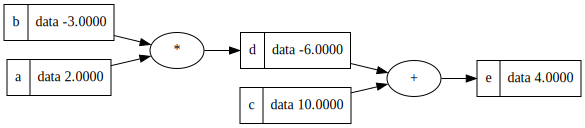

In [16]:
plota_grafo(e)

### Refazendo o grafo que fizemos na aula anterior



Na aula anterior nós fizemos um grafo computacional para aprender como funciona o backpropagation. Vamos refazer ele aqui!



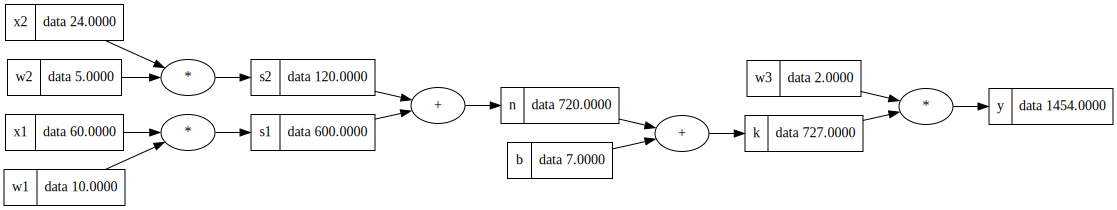

In [17]:
x1 = Valor(60, rotulo="x1")
x2 = Valor(24, rotulo="x2")
w1 = Valor(10, rotulo="w1")
w2 = Valor(5, rotulo="w2")
w3 = Valor(2, rotulo="w3")
b = Valor(7, rotulo="b")

s1 = x1 * w1
s1.rotulo = "s1"

s2 = x2 * w2
s2.rotulo = "s2"

n = s1 + s2
n.rotulo = "n"

k = n + b
k.rotulo = "k"

y = k * w3
y.rotulo = "y"

plota_grafo(y)

## Conclusão



<p style='text-align: justify'>Neste experimento, pudemos cumprir, felizmente, o objetivo de construir um grafo automaticamente.</p>
<p style='text-align: justify'>Comentando sobre a parte técnica, isso foi possível com a instalação de um software (<a href="https://graphviz.org/">graphviz</a>) e pela utilização de um site <a href="https://dreampuf.github.io/GraphvizOnline/">https://dreampuf.github.io/GraphvizOnline/</a> que também permite a visualização de grafos.</p>
<p style='text-align: justify'>Agora, quanto a parte conceitual, foi importante que: pudemos aprender a necessidade de definirmos as operações dentro das classes (para o python entender como trabalhar com objetos daquela espécie) e como fazemos isso; pudemos ter o conhecimento de como registrar, em python, os progenitores e operadores mãe; além de rotulagem dos vértices (o que facilita muito o entendimento e organização); e como plotar usando o software ou o site.</p>
<p style='text-align: justify'>De posse de tudo isso, agora estamos mais do que bem equipados para prosseguirmos no conteúdo e podermos plotar grafos também para problemas como o do caixeiro viajante e dentre outras operações matemáticas.</p>

## Playground



In [18]:
try:
    import graphviz
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install graphviz

In [19]:
class Valor_teste:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        saida = Valor(self.data + 2*outro_valor.data)
        return saida

    def __mul__(self, outro_valor):
        saida = Valor(self.data * outro_valor.data + self.data)
        return saida

In [20]:
at = Valor_teste(10)
bt = Valor_teste(5)

print(at + bt)
print(at * bt)

Valor(data=20)
Valor(data=60)
